In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [4]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
yen_futures["Settle_Returns"] = yen_futures.Settle.pct_change() *100
yen_futures = yen_futures.replace(-np.inf, np.nan).dropna()
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Settle_Returns
Date,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502


### Lagged Returns 

In [5]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
yen_futures['Lagged_Returns'] = yen_futures.Settle_Returns.shift()
yen_futures = yen_futures.dropna()
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Settle_Returns,Lagged_Returns
Date,,,,,,,,,,
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,9789.0,105498.0,201486.0,0.327970,0.020502


### Train Test Split

In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2018']
test = yen_futures['2018':]

In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train = train['Lagged_Returns'].to_frame()
X_test = test['Lagged_Returns'].to_frame()
y_train = train['Settle_Returns']
y_test = test['Settle_Returns']

In [8]:
X_train

,Lagged_Returns
Date,
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
2014-02-25,0.020502
...,...
2018-12-24,-0.187545
2018-12-26,0.834485
2018-12-27,-0.893346


# Linear Regression Model

In [9]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [20]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
predictions = model.predict(X_test)
predictions[:10]

array([-0.00588736, -0.0065973 , -0.00132512, -0.00159424, -0.00021283,
       -0.00429076, -0.00749427, -0.01507303, -0.00596728, -0.00384555])

In [34]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
test_predictions = y_test.to_frame()
test_predictions["Predicted_Return"] = predictions
test_predictions.head()

,Settle_Returns,Predicted_Return
Date,,
2018-01-02,0.297285,-0.005887
2018-01-03,-0.240479,-0.006597
2018-01-04,-0.213028,-0.001325
2018-01-05,-0.353933,-0.001594
2018-01-08,0.062017,-0.000213


/Users/mindybright/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/mindybright/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

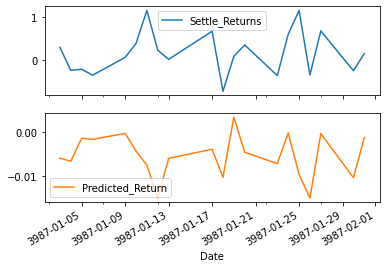

In [30]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
test_predictions[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [39]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# YOUR CODE HERE!
mse = mean_squared_error(test_predictions['Settle_Returns'], test_predictions['Predicted_Return'])

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
rmse = np.sqrt(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Square Error (MSE): 0.1724049501748365
Root Mean Squared Error (RMSE): 0.41521675083603804


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [40]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample['In_Sample_Predictions'] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse = mean_squared_error(in_sample['Settle_Returns'], in_sample['In_Sample_Predictions'])


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse = np.sqrt(in_sample_mse)

print(f"In-sample Mean Squared Error (MSE): {in_sample_mse}")
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Mean Squared Error (MSE): 0.320209767675256
In-sample Root Mean Squared Error (RMSE): 0.5658708047560468


# Conclusions

YOUR CONCLUSIONS HERE!

Although RMSE validity varies depending on scale of numbers used, in this model RMSE is higher for in-sample data and lower for. out-of-sample data. This implies that the out-of-sample data is more accurate than the in-sample data. Off by just over 0.10, additional data points could very easily switch the RMSE. 

MSE is lower for the in-sample data and higher for the out-of-sample data. This implies that there is less variance from the in-sample data. Having more variance in the out-of-sample data could potentially lead to a higher MSE for in-sample data as time goes on. 